# Systeme chatakterisieren im Zeitraum

Mit dem *white box*-Verfahren lösen wir das System-Identifizierungsproblem indem wir genau analysieren, aus welchen Komponenten unser System besteht. Anhand eines Tiefpasses 1. Ordnung, wie in {numref}`LP` dargestellt, wollen wir uns die Vorgehensweise einmal ansehen. 

:::{figure-md} LP
<img src="draw/LP.jpg" alt="LP" class="bg-primary mb-1" width="300px" label = LP>

Schaltbild eines passiven Tiefpasses 1. Ordnung.
:::

## Differentialgleichung aufstellen

In diesem Falle gucken wir in unser System rein. Wir sehen die elektronische Schaltung bestehend aus einer Reihenschaltung von Widerstand mit Wert $R$ und Kondensator mit Kapazität $C$. 

Am Eingang liegt die Spannung $u_e(t)$ an. Über $C$ kann die Ausgangsspannung $u_a(t)$ gemessen werden. Der Strom, mit dem der Kodensator aufgeladen ist bekanntlich

$$i_C(t) = C\cdot \frac{du_a}{dt}$$

wobei $u_a(t)$ im allgemeinen die Spannung ist, die am Kondensator anfällt und in diesem Falle gleich der Ausgangsspannung ist. 

Außerdem gilt $i_R(t) = i_C(t)$. Damit können wir die Spannung, die über den Widerstand $R$ abfällt, wie folgt schreiben:

$$u_R(t) = R \cdot i_R(t) = R \cdot C\cdot \frac{du_a}{dt}$$

Aus der Maschenregel, hier $ u_a(t) + u_R(t) = u_e(t)$ folgt nach Einsetzen von $u_R(t)$ folgendes:

$$RC \frac{du_\mathrm a (t)}{dt} + u_\mathrm a (t) = u_\mathrm e (t)$$

Dies ist eine **Differentialgleichung (DGL) 1. Ordnung**. Die Differentialgleichung erkannt man daran, dass auch eine zeitliche Ableitung der Ausgangsgröße (also ein Differential) in der Formel auftritt. Da allerdings nur die 1. zeitliche Ableitung auftritt, handelt es sich um eine DGL 1. Ordnung. Würde Ausgangs oder Eingangsgröße zweimal zeitliche abgeleitet werden, würde es sich um eine DGL 2. Ordnung handeln usw. 

Systeme 1. Ordnung beschreiben *Energiespeicher*, also z.B. Temperaturmesser, die warm werden, oder auch Operationsverstärker, Kapazitäten und Elektromagneten. Im Prinzip ist jedes System, was sich erwärmt, ein Energiespeicher und wird somit ein System 1. Ordnung sein. Systeme 2. Ordnung haben einen zusätzlichen Dämpfungsterm. In diesen Systeme findet auch eine Umlagerung von Energien statt, wie es z.B. in einem LC-Schwingkreis passiert. Kondensator und Spule tauschen ständig Energien aus, wodurch es zu einer periodischen Schwingung kommt. Dieses System wir durch eine DGL 2. Ordnung beschrieben. 

## Lösung der DGL für Sprunganregung im Zeitbereich

Ziel ist es jetzt, eine Funktion für Eingangs- und Ausgangsspannung zu finden, die diese Gleichung erfüllt. Hierfür geht man im Allgemeinen in 5 Schritten vor. Wie werden später in diesem Kapitel noch sehen, dass DGL im Frequenz- bzw. Laplaceraum viel einfacher gelöst werden können als wir es hier, im Zeitraum, jetzt machen.

* **1. Homogener Ansatz**
Unter homogenen Ansatz verstehen wir das Eingangssignal auf Null zu setzen: $u_e(t) = 0$. Das heißt das System wird nicht belastet. Die DGL vereinfacht sich zu

$$RC \frac{du_\mathrm a (t)}{dt} + u_\mathrm a (t) = 0$$

und kann umgeformt werden zu

$$RC \frac{du_\mathrm a (t)}{dt} = -u_\mathrm a (t)$$

Das bedeutet, wird suchen eine Funktion für $u_a(t)$ die nach der Zeit abgeleitet wieder sie selber ist. Eine Exponentialfunktion erfüllt genau diese Bedingung und wir nutzen sie für unseren homogenen Ansatz:

$$u_{a,\mathrm{homogen}}(t) = K \cdot \mathrm e^{-\gamma t} \quad \Rightarrow \quad \dot u_{a,\mathrm{homogen}}(t) = -\gamma K \cdot \mathrm e^{-\gamma t}$$

mit den Konstanten $K$ und $\gamma$. Dies wird in die homogene DGL eingesetzt und es folgt:

$$-RCK\gamma \mathrm e^{-\gamma t} + K \mathrm e^{-\gamma t} = 0 \quad \Rightarrow \quad -RC\gamma + 1 = 0$$

Daraus folgt für die erste Konstante 

$$\gamma = \frac{1}{RC} := \frac{1}{\tau}$$

* **2. Spezieller Ansatz eine Sprunganregung**
Jetzt legen wir statt Null einen *Sprung* an den Eingang $u_e(t)$ an: $u_e(t) = u_0$ für $t = 0$. Für lange Zeiten wird sich der Kondensator komplett aufgeladen haben, sodass der Ausgang ein konstantes Signal liefert. Das heißt unsere Lösung für ein spezielles Eingangssignal ist

$$u_{a,\mathrm{speziell}}(t) = u_0 \quad \mathrm{für} \quad t \rightarrow \infty$$

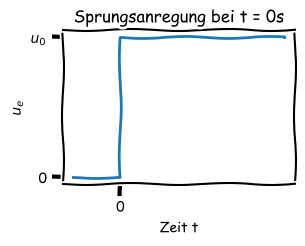

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
from scipy import signal 
import scipy.integrate as spi
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default') # Matplotlib Style wählen
plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße


def heaviside_step_function(t):
    if t < 0:
        res = 0
    else:
        res = 1
    return res


T = 1
t2 = np.linspace(-2*T, 7*T, 1000, endpoint = True)
y_step = []
for i in t2:
    y_step.append(heaviside_step_function(i))
    
# Plotting
fig, ax = plt.subplots(figsize=(3,2))
plt.plot(t2,y_step, color = 'tab:blue')
ax.set_yticks([0,1], labels = ['0', r'$u_0$'])
ax.set_xticks([0])
plt.title('Sprungsanregung bei t = 0s')
plt.xlabel('Zeit t')
plt.ylabel(r'$u_e$')
plt.show()

* **3. Allgemeiner Ansatz**
Nun kann der allgemeine Ansatz formuliert werden. Diese ist einfach die Addition von homogener und spezieller Ansatz:

$$u_a(t) = u_{a,\mathrm{homogen}}(t) + u_{a,\mathrm{speziell}}(t) = u_0 + K \cdot \mathrm e^{-t/\tau}$$

* **4. Konstante bestimmen**
Eine Konstante war schon bestimmt, nämlich $\gamma = \frac{1}{RC} := \frac{1}{\tau}$. Diese Zeitkonstante wurde bereits in den allgemeinen Ansatz unter 3. eingefügt. Um $K$ zu bestimmen, setzen wir unsere Anfangsbedingung von Schritt 2. ein: Zum Zeitpunkt $t=0$ ist das System zwar am Eingang mit $u_0$ belastet, der Ausgang ist jedoch noch Null, solange der Kondensator nicht vollständig aufgeladen ist. Wir setzen also $t=0$, $u_e(t=0) = u_0$ und $u_a(t = 0) = 0$ in den allgemein Ansatz ein:

$$u_a(0) = u_0 + K \cdot \mathrm e^{-0/\tau}$$
$$0 = u_0 + K \cdot 1 \quad \Rightarrow \quad K = -u_0$$

* **5. Lösung hinschreiben**
Für die Lösung setzen wir alle unsere bestimmten Konstanten in den allgemeinen Ansatz ein und erhalten:

$$u_a(t) = u_0 \left(1- \mathrm e^{-\frac{t}{RC}}\right)$$

Dies ist auch die sogenannte **Sprungantwort** eines Systems 1. Ordnung, da wir in Schritt 2. einen *Sprung* angelegt haben. Hätten wir uns als Eingangssignal einen Impuls (eine Delta-Funktion) ausgesucht, hätten wir die **Impulsantwort** des Systems bestimmt.

### Eigenschaften von Sprung- und Impulsantwort

Um ein vorliegendes Messsystem im Labor zu charakterisieren kann man beispielsweise das System mit einem Sprung anregen und die Sprungantwort messen. 

Im nachfolgenden Bild ist die Sprungsantwort des Tiefpasses 1. Ordnung gezeichnet. Was kann man aus der Sprungsantwort direkt alles ablesen?

* Geplottet im nachfolgenden Bild ist die normalisierte Sprungantwort, d.h. das Ausgangssignal wurde durch $u_0$ dividiert. Nach langer Einpendelzeit folgt der Ausgang dem Eingangssignal.
* $\tau$ ist die Zeitkonstante, die die *Trägheit* eines Systems bestimmt. 
    * Aus der Theorie ist bekannt: $\tau = RC$ 
    * Nach der Zeit $\tau$ ist das Ausgangssignal auf 63% seines maximal möglichen Wertes angestiegen. Es ist noch kein stationärer Zustand erreicht.
* Einstellzeit $t_e$: Dies ist das *95%-Kriterium*:
    * Für ein System 1. Ordnung muss die Sprungantwort $h(t)$ nach der Zeit $t = 3\tau$ 95% des Endwertes erreicht haben.
    * Nur wenn dies der Fall ist, handelt es sich um ein System mit Ausgleich 1. Ordnung
    * Für ein System 2. Ordnung ist häufig ein Überschwingungen oder Einpendeln zubeoachten. Dann ist $t_e$ Zeit vom Anlegen der Sprungfunktion bis zum Erreichen des Toleranzbandes innerhalb von 0,95 und 1,05.
* *Anstiegszeit* $t_r$: Dies ist die Dauer für einen Signalanstieg von 10% auf 90% am Ausgang des Systems.

NameError: name 'y_impuls' is not defined

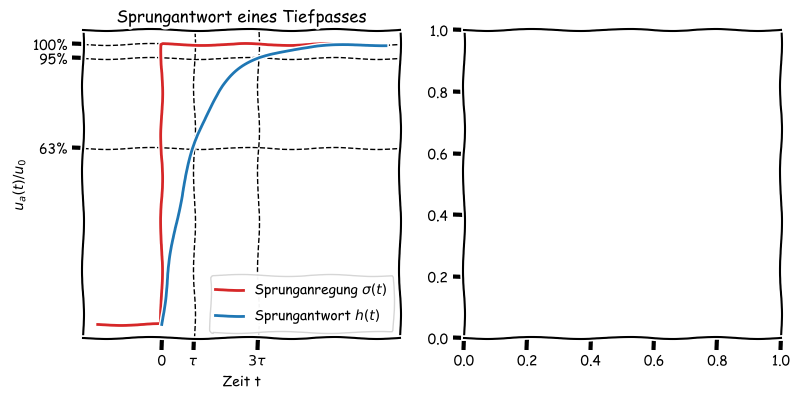

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

# Transfer Funktion Tiefpass:
K = 1 # Verstärkungsfaktor
T = 1 # Zeit nach der 63% des Signals erreicht ist
num = np.array([K])
den = np.array([T , 1])
H = signal.TransferFunction(num , den)

# Sprungantwort:
t, y = signal.step(H)

# Impulsantwort
t_imp, y_imp = signal.impulse(H)

# Plotting
fig, ax = plt.subplots(figsize=(9,4))
plt.subplot(1,2,1)
plt.axhline(y = 1.0, color='k', ls = '--', lw = 1)
plt.axhline(y = 0.95, color='k', ls = '--', lw = 1)
plt.axhline(y = 0.63, color='k', ls = '--', lw = 1)
plt.axvline(x = T, color='k', ls = '--', lw = 1)
plt.axvline(x = 3*T, color='k', ls = '--', lw = 1)
plt.plot(t2,y_step, color = 'tab:red', label = r'Sprunganregung $\sigma(t)$')
plt.plot(t, y, color='tab:blue', label = r'Sprungantwort $h(t)$')
plt.yticks([1.0, 0.95,0.63], labels = ['100%','95%', '63%'])
plt.xticks([0,T,3*T], labels = ['0',r'$\tau$',r'$3\tau$'])
plt.title("Sprungantwort eines Tiefpasses")
plt.xlabel("Zeit t")
plt.ylabel(r'$u_a(t)/u_0$')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t2,y_impuls, color = 'tab:orange', label = r'Impulsanregung $\delta(t)$')
plt.plot(t_imp, y_imp, color='tab:blue', label = r'Impulsantwort $g(t)$')
plt.yticks([1.0, 0.5,0.0], labels = ['100%','50%', '0%'])
plt.title("Impulsantwort eines Tiefpasses")
plt.xlabel("Zeit t")
plt.legend()
#plt.ylabel(r'$u_a(t)/u_0$')
plt.tight_layout
plt.show()

Folgende Eigenschaften bestehen zwischen Sprung- und Impulsantwort:

* Die Sprunganregung $\sigma(t)$ liefert die Sprungantwort $h(t)$
* Die Impulsanregung $\delta(t)$ liefert die Impulsanregung $g(t)$
* Die Ableitung der Sprunganregung $\sigma(t)$ ist die Impulsanregung $\delta(t)$, d.h. es gilt:

    $$\dot \sigma(t) = \frac{d\sigma(t)}{dt} = \delta(t)$$
    
* Für LTI Systeme gilt, dass auch die Ableitung der Sprungantwort $h(t)$ die Impulsantwort $g(t)$ liefert:

    $$\dot h(t) = \frac{dh(t)}{dt} = g(t)$$

* D.h. Sprung und Impulsverhalten eines Messsystems können mittels Ableitung bzw. Integration direkt ineinaner umgerechnet werden, ohne eines neues Testsignal anlegen zu müssen (oder die DGL neu zu lösen)

## Lösung der DGL für Sprunganregung im Frequenzbereich

Eine handlichere Methode DGL's zu lösen ist es diese zuerst in den Frequenzbereich zu transformieren. 

* **1. DGL transformieren:** Die Signale werden in den Frequenzraum transformiert. 

    * $u_\mathrm e (t) \rightarrow U_e(j \omega)$
    * $u_\mathrm a (t) \rightarrow U_a(j \omega)$
    * $\dot u_\mathrm a (t) \rightarrow j \omega U_a(j \omega)$
    
    Der letzte Punkt resultiert aus den Eigenschaften von Fourier-Transformationen für zeitliche Ableitungen von Zeitsignalen:

    In der DGL werden die Zeitsignale durch die Fourier-Transformierten ersetzt:

    $$\tau j \omega U_\mathrm a(j \omega) + U_\mathrm a (j \omega) = U_\mathrm e (j \omega)$$

* **2. Sprunganregung einsetzen:** Die Fourier-Transformierte der Sprunganregung ist:

    $$\mathcal F(u_e(t)) = \frac{1}{j\omega} =: U_\mathrm e (j \omega)$$

    Die wird oben in die transformierte DGL eingesetzt:
    
    $$\tau j \omega U_\mathrm a(j \omega) + U_\mathrm a (j \omega) = \frac{1}{j\omega} $$

* **3. Lösung hinschreiben:** Die letze Gleichung wird nach $U_\mathrm a (j \omega)$ aufgelöst:
    
    $$\Rightarrow U_\mathrm a (j \omega) = \frac{1}{j\omega \cdot (1 + \tau j \omega)}$$
    

Hierbei handelt es sich um die Lösung im Frequenzraum, die nach einer Rück-Transformation die gleich Sprungantwort liefert wie oben bereits hergeleitet.
In allgemeiner Form, also ohne das Einsetzen einer Sprunganregung, führt uns dieser Ansatz jedoch zu der sogenannten **Übertragungsfunktion**, mit der wir uns im nächsten Kapitel beschäftigen wollen.

## Weitere Testfunktionen

In der Messtechnik wird das Übertragungsverhalten einer Messeinrichtung mittels Testfunktionen im Labor überprüft. **Sprung** und **Impuls** gehören zu den meist benutzten Testfunktionen, doch auch eine **Rampen**funktion (ein sich kontinuierlich erhöhendes Eingangssignal) oder ein **Sweep** (hier werden verschiedene Frequenzen direkt nacheinander durchgefahren) haben sich bewährt. 

In [ ]:
# Impuls:
def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val

y_impuls = ddf(t2,6.)

# Plotting
fig, ax = plt.subplots(figsize=(7,4))
plt.subplot(2,2,1)
plt.plot(t2,y_step, color = 'tab:red', label = 'Sprunganregung')
plt.title(r'Sprung $\sigma(t)$')
plt.subplot(2,2,2)
plt.plot(t2,y_impuls, color = 'tab:orange', label = 'Impuls')
plt.title(r'Impuls $\delta(t)$')
plt.subplot(2,2,3)
plt.plot(t2,t2/np.max(t2), color = 'tab:green', label = 'Rampe')
plt.title(r'Rampe $t\cdot \sigma(t)$ ')
plt.xlabel("Zeit t")

plt.subplot(2,2,4)
plt.plot(t2,signal.chirp(t2, f0=4, f1=0.2, t1=7, method='linear'), color = 'tab:olive', label = 'Shirp')
plt.title(r'Sweep $f(t)$ ')
plt.xlabel("Zeit t")

plt.tight_layout()

Das Vorgehen ist wiefolgt: Es wird eine Testfunktion als Eingangssignal $u_e(t)$ angelegt und gemessen. Der Ausgang des Systems wird abgegriffen und das Ausgangssignal $u_a(t)$ ebenfalls gemessen. Ein Vergleich aus angelegtem Eingangssignal und gemessener Systemantwort (Ausgangssignal) können Rückschlüsse für das System getroffen werden. 